In [1]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
import numpy as np
import pickle
import random
from numpy.random import seed
import time
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import pandas as pd
from secrets import randbelow

In [2]:
pickle_in = open("Xtrain96.pickle","rb")
Xtrain = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain = pickle.load(pickle_in)

Xtrain=np.array(Xtrain/255.0)
ytrain=np.array(ytrain)

pickle_in = open("Xval96.pickle","rb")
Xval = pickle.load(pickle_in)

pickle_in = open("yval96.pickle","rb")
yval = pickle.load(pickle_in)

pickle_in = open("XTest96.pickle","rb")
Xtest = pickle.load(pickle_in)

pickle_in = open("ytest96.pickle","rb")
ytest = pickle.load(pickle_in)

pickle_in = open("Xtrain96.pickle","rb")
Xtrain2 = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain2 = pickle.load(pickle_in)

# Genetic Algorithm

In [3]:
class GA():
    def __init__(self,popsize, iter_):
        self.popsize = popsize
        self.iter_ = iter_
        
    def popinit(self):
        population = [] 
        random.seed(99)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(self.popsize):
            inPop = [random.choice(fmap),random.choice(kernel),random.choice(learningRate),random.choice(dropout),random.choice(layer),random.choice(pool),random.choice(node)]
            population.append(inPop)
        return population

        
    def fitness(self,population,X,y):
        savefit=[]
        for i in range(len(population)):
            pop = population[i]
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(99)
            tf.random.set_seed(99)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

        return savefit
    
    def fitmutation(self,mut,X,y):
            pop = mut
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(99)
            tf.random.set_seed(99)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse
            return fitmut
        
    
    def parent_select(self,population, fitness):
        sumfit = np.sum(fitness)
        prob=[]
        parent_1=[]
        random.seed(99)
        for i in range(len(fitness)):
            tmp = fitness[i]/sumfit
            prob.append(tmp)
        prob_range = []
        sum_ = 0
        for i in range(len(prob)):
                sum_ += prob[i]
                prob_range.append(sum_)
        for i in range(len(prob)):
                rand = random.random()
                if rand <= prob_range[i]:
                    parent_1 = population[i]
                    break
        # select second parent
        parent_2 = parent_1
        while (parent_2 == parent_1):
                for i in range(len(prob)):
                    rand = random.random()
                    if rand <= prob_range[i]:
                        parent_2 = population[i]
                        break
        return parent_1, parent_2
    
    def cross_over(self,parent1, parent2):
        random.seed(99)
        crosspoint = random.randrange(0,6)
        child1 = parent1[:crosspoint+1] + parent2[crosspoint+1:]
        child2 = parent2[:crosspoint+1] + parent1[crosspoint+1:] 
        return child1, child2
    
    def mutation(self,child1, child2):
        import copy
        random.seed(99)
        tmp1 = copy.deepcopy(child1)
        tmp2 = copy.deepcopy(child2)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(len(tmp1)):    
            if (i == 0) :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(fmap)
                    tmp2[point] = random.choice(fmap)
            elif (i ==1):
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(kernel)
                    tmp2[point] = random.choice(kernel)
            elif (i == 2) :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(learningRate)
                    tmp2[point] = random.choice(learningRate)
            elif (i == 3) :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(dropout)
                    tmp2[point] = random.choice(dropout)
            elif (i == 4) :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(layer)
                    tmp2[point] = random.choice(layer)
            elif (i == 5) :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(pool)
                    tmp2[point] = random.choice(pool)
            else :
                prob = random.random()
                if (prob<=0.01) :
                    tmp1[point] = random.choice(node)
                    tmp2[point] = random.choice(node)
        return tmp1, tmp2
       
    def sort(self, population, fitness):
        tmp_dict = {'population' : population,'fitness': fitness }
        df = pd.DataFrame(tmp_dict)
        df.sort_values('fitness', ascending=True, inplace=True)
        new_pop = df['population'].values.tolist()
        fit = df['fitness'].values.tolist()
        return new_pop, fit
    
    def newfit(self,mut1,mut2,listindividu,X,y) :
        tmpmut=[]
        tmpfit1=0.0
        tmpfit2=0.0
        tmpmut.append(mut1)
        tmpmut.append(mut2)
        for i in listindividu:
            if i[0] == mut1 :
                tmpfit1  = (i[1])
            if i[0] == mut2 :
                tmpfit2 = (i[1])
        if (tmpfit1)==0.0 and (tmpfit2)==0.0 :
            fitness = self.fitness(tmpmut,X,y)
            fit1 = fitness[0]
            fit2 = fitness[1]
        elif (tmpfit1)==0.0 :
            fit1 = self.fitmutation(mut1,X,y)
            fit2 = tmpfit2
        else :
            fit1= tmpfit1
            fit2 = self.fitmutation(mut2,X,y)
        return fit1,fit2
                        
    
    def fit(self,X,y):
        pop = self.popinit()
        fitness = self.fitness(pop,X,y)
        listindividu =[]
        for i in range(len(pop)):
            a = pop[i]
            b = fitness[i]
            temp=[a,b]
            listindividu.append(temp)
        print(pop)
        print(fitness)
        bestingen =[]
        index = np.argmin(fitness)
        popgen = pop[index]
        fitgen = fitness[index]
        bestingen.append('Generasi 0')
        bestingen.append(popgen)
        bestingen.append(fitgen)
        for i in range(self.iter_):
            print( 'Generasi Ke ' , i+1 )
            parent_1, parent_2 = self.parent_select(pop, fitness)
            print('Parent 1 dan 2 ', parent_1, parent_2)
            child_1, child_2 = self.cross_over(parent_1, parent_2)
            print('Child 1 dan 2', child_1, child_2 )
            mut1, mut2 = self.mutation(child_1, child_2)
            print('Mutasi 1 dan 2', mut1, mut2)
            pop, fitness = self.sort(pop,fitness)
            fitmut1,fitmut2 = self.newfit(mut1,mut2,listindividu,X,y)
            pop[-1] = mut1; pop[-2] = mut2
            fitness[-1] = fitmut1 ; fitness[-2] = fitmut2
            mutt=[]
            mutt.append(mut1)
            mutt.append(mut2)
            fitmut=[]
            fitmut.append(fitmut1)
            fitmut.append(fitmut2)
            update=[]
            for i in range(len(mutt)) :
                a = mutt[i]
                b = fitmut[i]
                temp=[a,b]
                update.append(temp)
            listindividu.extend(update)
            print(pop)
            print(fitness)
            index = np.argmin(fitness)
            popgen = pop[index]
            fitgen = fitness[index]
            bestingen.append(popgen)
            bestingen.append(fitgen)
        idx_ = np.argmin(fitness)
        best_pop = pop[idx_]
        return  best_pop,bestingen

In [4]:
featSelection = GA( popsize=10, iter_=20)

In [5]:
feat,besteverygen = featSelection.fit(Xtrain,ytrain)

Epoch 1/10
66/66 [==============================] - 279s 90ms/step - loss: 0.8434 - accuracy: 0.5207 - val_loss: 0.6919 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6909 - accuracy: 0.5119 - val_loss: 0.5989 - val_accuracy: 0.6846
Epoch 3/10
66/66 [==============================] - 3s 47ms/step - loss: 0.6221 - accuracy: 0.6869 - val_loss: 0.6127 - val_accuracy: 0.7025
Epoch 4/10
66/66 [==============================] - 3s 47ms/step - loss: 0.5860 - accuracy: 0.6940 - val_loss: 0.5228 - val_accuracy: 0.7472
Epoch 5/10
66/66 [==============================] - 3s 47ms/step - loss: 0.5313 - accuracy: 0.7345 - val_loss: 0.4815 - val_accuracy: 0.7987
Epoch 6/10
66/66 [==============================] - 3s 47ms/step - loss: 0.4583 - accuracy: 0.7782 - val_loss: 0.4470 - val_accuracy: 0.8098
Epoch 7/10
66/66 [==============================] - 3s 47ms/step - loss: 0.4272 - accuracy: 0.8093 - val_loss: 0.4549 - val_accuracy: 0.8054
Epoch 8/10


D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 5s 44ms/step - loss: 0.6937 - accuracy: 0.5310 - val_loss: 0.6916 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6950 - accuracy: 0.4791 - val_loss: 0.6917 - val_accuracy: 0.6644
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6896 - accuracy: 0.5521 - val_loss: 0.6645 - val_accuracy: 0.6756
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6444 - accuracy: 0.6519 - val_loss: 0.5726 - val_accuracy: 0.7204
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5788 - accuracy: 0.7223 - val_loss: 0.4683 - val_accuracy: 0.7987
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4895 - accuracy: 0.7766 - val_loss: 0.3904 - val_accuracy: 0.8412
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.3330 - accuracy: 0.8457 - val_loss: 0.2301 - val_accuracy: 0.9083
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 5s 48ms/step - loss: 0.7000 - accuracy: 0.4791 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6935 - accuracy: 0.4751 - val_loss: 0.6931 - val_accuracy: 0.5749
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6939 - accuracy: 0.4981 - val_loss: 0.6924 - val_accuracy: 0.6465
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5649 - val_loss: 0.6735 - val_accuracy: 0.6197
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6686 - accuracy: 0.6279 - val_loss: 0.6553 - val_accuracy: 0.6756
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6032 - accuracy: 0.7517 - val_loss: 0.6349 - val_accuracy: 0.6219
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5480 - accuracy: 0.7086 - val_loss: 0.5128 - val_accuracy: 0.7383
Epoch 8/10
66/66 [

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 9s 93ms/step - loss: 0.6968 - accuracy: 0.4664 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6934 - accuracy: 0.4898 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6936 - accuracy: 0.4685 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 2s 30ms/step - loss: 0.6934 - accuracy: 0.5114 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6931 - accuracy: 0.5091 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6932 - accuracy: 0.4868 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6929 - accuracy: 0.5287 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 7s 72ms/step - loss: 0.6935 - accuracy: 0.4974 - val_loss: 0.6927 - val_accuracy: 0.5168
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6929 - accuracy: 0.4860 - val_loss: 0.6672 - val_accuracy: 0.6779
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6562 - accuracy: 0.6121 - val_loss: 0.5632 - val_accuracy: 0.7226
Epoch 4/10
66/66 [==============================] - 1s 22ms/step - loss: 0.5764 - accuracy: 0.7197 - val_loss: 0.5280 - val_accuracy: 0.7450
Epoch 5/10
66/66 [==============================] - 1s 22ms/step - loss: 0.5227 - accuracy: 0.7503 - val_loss: 0.5451 - val_accuracy: 0.7293
Epoch 6/10
66/66 [==============================] - 1s 20ms/step - loss: 0.4936 - accuracy: 0.7798 - val_loss: 0.4791 - val_accuracy: 0.7606
Epoch 7/10
66/66 [==============================] - 1s 19ms/step - loss: 0.4489 - accuracy: 0.7997 - val_loss: 0.4463 - val_accuracy: 0.8031
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 7s 67ms/step - loss: 0.6932 - accuracy: 0.4945 - val_loss: 0.6914 - val_accuracy: 0.6152
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6924 - accuracy: 0.5220 - val_loss: 0.6869 - val_accuracy: 0.7025
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6833 - accuracy: 0.5746 - val_loss: 0.6243 - val_accuracy: 0.6532
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5928 - accuracy: 0.6991 - val_loss: 0.5300 - val_accuracy: 0.7293
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5605 - accuracy: 0.7246 - val_loss: 0.5170 - val_accuracy: 0.7472
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4795 - accuracy: 0.8018 - val_loss: 0.4696 - val_accuracy: 0.8009
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4605 - accuracy: 0.7853 - val_loss: 0.4717 - val_accuracy: 0.7875
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 33ms/step - loss: 0.6884 - accuracy: 0.5471 - val_loss: 0.6536 - val_accuracy: 0.5839
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6665 - accuracy: 0.5908 - val_loss: 0.7415 - val_accuracy: 0.5928
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5844 - accuracy: 0.6922 - val_loss: 0.5396 - val_accuracy: 0.6913
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5108 - accuracy: 0.7589 - val_loss: 0.4777 - val_accuracy: 0.7830
Epoch 5/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5127 - accuracy: 0.7661 - val_loss: 0.4902 - val_accuracy: 0.7785
Epoch 6/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4805 - accuracy: 0.7892 - val_loss: 0.4306 - val_accuracy: 0.8188
Epoch 7/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4146 - accuracy: 0.7984 - val_loss: 0.4192 - val_accuracy: 0.8501
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6857 - accuracy: 0.5612 - val_loss: 0.6364 - val_accuracy: 0.7271
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6350 - accuracy: 0.6647 - val_loss: 0.5703 - val_accuracy: 0.7360
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5791 - accuracy: 0.6639 - val_loss: 0.5616 - val_accuracy: 0.6756
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5163 - accuracy: 0.7386 - val_loss: 0.5024 - val_accuracy: 0.7606
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4876 - accuracy: 0.7718 - val_loss: 0.4710 - val_accuracy: 0.7875
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4832 - accuracy: 0.7812 - val_loss: 0.4328 - val_accuracy: 0.8098
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4322 - accuracy: 0.7925 - val_loss: 0.4051 - val_accuracy: 0.8546
Epoch 8/10
66/66 [==

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 38ms/step - loss: 0.6889 - accuracy: 0.5406 - val_loss: 0.6476 - val_accuracy: 0.7271
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6366 - accuracy: 0.6505 - val_loss: 0.5643 - val_accuracy: 0.7181
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5486 - accuracy: 0.7372 - val_loss: 0.4994 - val_accuracy: 0.7517
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4736 - accuracy: 0.7867 - val_loss: 0.4466 - val_accuracy: 0.8009
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4291 - accuracy: 0.8070 - val_loss: 0.3984 - val_accuracy: 0.8300
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4037 - accuracy: 0.8381 - val_loss: 0.3867 - val_accuracy: 0.8412
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.3573 - accuracy: 0.8471 - val_loss: 0.3393 - val_accuracy: 0.8859
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 36ms/step - loss: 12.5955 - accuracy: 0.5113 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 16ms/step - loss: 0.6948 - accuracy: 0.4724 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 1s 17ms/step - loss: 0.6936 - accuracy: 0.4510 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 16ms/step - loss: 0.6936 - accuracy: 0.5114 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 16ms/step - loss: 0.6932 - accuracy: 0.5091 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 16ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 16ms/step - loss: 0.6928 - accuracy: 0.5287 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 8/10
6

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 18ms/step - loss: 0.6934 - accuracy: 0.5144 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.4926 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.4895 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.5166 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5179 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6921 - accuracy: 0.5329 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 22ms/step - loss: 0.6906 - accuracy: 0.5166 - val_loss: 0.6623 - val_accuracy: 0.6868
Epoch 2/10
66/66 [==============================] - 1s 20ms/step - loss: 0.6428 - accuracy: 0.6410 - val_loss: 0.5816 - val_accuracy: 0.7181
Epoch 3/10
66/66 [==============================] - 1s 20ms/step - loss: 0.5459 - accuracy: 0.7390 - val_loss: 0.4758 - val_accuracy: 0.7830
Epoch 4/10
66/66 [==============================] - 1s 20ms/step - loss: 0.4723 - accuracy: 0.7790 - val_loss: 0.4807 - val_accuracy: 0.7987
Epoch 5/10
66/66 [==============================] - 1s 20ms/step - loss: 0.4736 - accuracy: 0.7923 - val_loss: 0.4987 - val_accuracy: 0.7517
Epoch 6/10
66/66 [==============================] - 1s 20ms/step - loss: 0.4047 - accuracy: 0.8500 - val_loss: 0.3580 - val_accuracy: 0.8546
Epoch 7/10
66/66 [==============================] - 1s 20ms/step - loss: 0.3489 - accuracy: 0.8420 - val_loss: 0.2861 - val_accuracy: 0.8949
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 3s 34ms/step - loss: 0.6968 - accuracy: 0.4650 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6933 - accuracy: 0.4910 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6935 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 2s 31ms/step - loss: 0.6934 - accuracy: 0.5114 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 2s 32ms/step - loss: 0.6931 - accuracy: 0.5091 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 2s 32ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 2s 32ms/step - loss: 0.6928 - accuracy: 0.5287 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.6915 - accuracy: 0.5325 - val_loss: 0.6756 - val_accuracy: 0.7181
Epoch 2/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6742 - accuracy: 0.5616 - val_loss: 0.6107 - val_accuracy: 0.7293
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6126 - accuracy: 0.6772 - val_loss: 0.5311 - val_accuracy: 0.7383
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5335 - accuracy: 0.7482 - val_loss: 0.4945 - val_accuracy: 0.7919
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5238 - accuracy: 0.7551 - val_loss: 0.4579 - val_accuracy: 0.8009
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4310 - accuracy: 0.8323 - val_loss: 0.4151 - val_accuracy: 0.8389
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8023 - val_loss: 0.3970 - val_accuracy: 0.8367
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 21ms/step - loss: 0.6937 - accuracy: 0.5037 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6930 - accuracy: 0.5216 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6963 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6934 - accuracy: 0.5114 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.5070 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.4841 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5231 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 24ms/step - loss: 0.6935 - accuracy: 0.4995 - val_loss: 0.6925 - val_accuracy: 0.5481
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6928 - accuracy: 0.4999 - val_loss: 0.6647 - val_accuracy: 0.7092
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6561 - accuracy: 0.6134 - val_loss: 0.5510 - val_accuracy: 0.7204
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5996 - accuracy: 0.7037 - val_loss: 0.5220 - val_accuracy: 0.7427
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5204 - accuracy: 0.7586 - val_loss: 0.5469 - val_accuracy: 0.7293
Epoch 6/10
66/66 [==============================] - 1s 21ms/step - loss: 0.4818 - accuracy: 0.7886 - val_loss: 0.4535 - val_accuracy: 0.7964
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.4177 - accuracy: 0.8165 - val_loss: 0.4466 - val_accuracy: 0.7875
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6918 - accuracy: 0.5459 - val_loss: 0.6747 - val_accuracy: 0.5660
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6654 - accuracy: 0.5995 - val_loss: 0.5859 - val_accuracy: 0.7069
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5892 - accuracy: 0.7030 - val_loss: 0.5122 - val_accuracy: 0.7785
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5070 - accuracy: 0.7564 - val_loss: 0.4715 - val_accuracy: 0.8031
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4458 - accuracy: 0.8225 - val_loss: 0.4178 - val_accuracy: 0.8479
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4259 - accuracy: 0.8224 - val_loss: 0.3668 - val_accuracy: 0.8702
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3555 - accuracy: 0.8538 - val_loss: 0.3134 - val_accuracy: 0.8904
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 27ms/step - loss: 0.6930 - accuracy: 0.4989 - val_loss: 0.6901 - val_accuracy: 0.5548
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6910 - accuracy: 0.5273 - val_loss: 0.6729 - val_accuracy: 0.6667
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6556 - accuracy: 0.6152 - val_loss: 0.6006 - val_accuracy: 0.6577
Epoch 4/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5602 - accuracy: 0.6890 - val_loss: 0.5240 - val_accuracy: 0.7472
Epoch 5/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5258 - accuracy: 0.7455 - val_loss: 0.5133 - val_accuracy: 0.7584
Epoch 6/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4773 - accuracy: 0.7873 - val_loss: 0.4789 - val_accuracy: 0.7830
Epoch 7/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4657 - accuracy: 0.7645 - val_loss: 0.4782 - val_accuracy: 0.7696
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.4926 - val_loss: 0.6917 - val_accuracy: 0.5056
Epoch 2/10
66/66 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.51 - 1s 11ms/step - loss: 0.6927 - accuracy: 0.5180 - val_loss: 0.6889 - val_accuracy: 0.6309
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6857 - accuracy: 0.5811 - val_loss: 0.6105 - val_accuracy: 0.6935
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5902 - accuracy: 0.6983 - val_loss: 0.5288 - val_accuracy: 0.7405
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5474 - accuracy: 0.7314 - val_loss: 0.5308 - val_accuracy: 0.7293
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4745 - accuracy: 0.8187 - val_loss: 0.4643 - val_accuracy: 0.7897
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4460 - accuracy: 0.7908 - val_loss: 0.4432 - val

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6929 - accuracy: 0.4877 - val_loss: 0.6918 - val_accuracy: 0.5101
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6918 - accuracy: 0.5431 - val_loss: 0.6887 - val_accuracy: 0.6398
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6858 - accuracy: 0.6239 - val_loss: 0.6928 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6733 - accuracy: 0.5809 - val_loss: 0.6409 - val_accuracy: 0.6443
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6229 - accuracy: 0.6885 - val_loss: 0.5928 - val_accuracy: 0.6801
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5629 - accuracy: 0.7517 - val_loss: 0.6007 - val_accuracy: 0.6868
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5588 - accuracy: 0.7210 - val_loss: 0.5611 - val_accuracy: 0.7204
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6863 - accuracy: 0.5492 - val_loss: 0.6462 - val_accuracy: 0.5996
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6561 - accuracy: 0.6001 - val_loss: 0.5545 - val_accuracy: 0.7159
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5763 - accuracy: 0.6689 - val_loss: 0.5136 - val_accuracy: 0.7539
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5015 - accuracy: 0.7530 - val_loss: 0.4460 - val_accuracy: 0.7987
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4793 - accuracy: 0.7859 - val_loss: 0.4219 - val_accuracy: 0.8523
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4209 - accuracy: 0.8221 - val_loss: 0.4291 - val_accuracy: 0.8009
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3892 - accuracy: 0.8142 - val_loss: 0.3369 - val_accuracy: 0.8658
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6862 - accuracy: 0.5488 - val_loss: 0.6544 - val_accuracy: 0.5749
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6620 - accuracy: 0.6013 - val_loss: 0.5546 - val_accuracy: 0.7248
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5784 - accuracy: 0.6683 - val_loss: 0.5402 - val_accuracy: 0.7025
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5015 - accuracy: 0.7475 - val_loss: 0.4398 - val_accuracy: 0.8121
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4817 - accuracy: 0.7879 - val_loss: 0.4181 - val_accuracy: 0.8434
Epoch 6/10
66/66 [==============================] - ETA: 0s - loss: 0.4286 - accuracy: 0.82 - 1s 10ms/step - loss: 0.4277 - accuracy: 0.8236 - val_loss: 0.3763 - val_accuracy: 0.8501
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3750 - accuracy: 0.8379 - val_loss: 0.3363 - val

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6862 - accuracy: 0.5492 - val_loss: 0.6459 - val_accuracy: 0.6063
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6579 - accuracy: 0.6093 - val_loss: 0.5527 - val_accuracy: 0.7226
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5742 - accuracy: 0.6852 - val_loss: 0.5373 - val_accuracy: 0.7114
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5075 - accuracy: 0.7607 - val_loss: 0.4470 - val_accuracy: 0.8076
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4804 - accuracy: 0.7795 - val_loss: 0.4270 - val_accuracy: 0.8456
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4296 - accuracy: 0.8256 - val_loss: 0.4151 - val_accuracy: 0.8166
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3857 - accuracy: 0.8347 - val_loss: 0.3295 - val_accuracy: 0.8859
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6861 - accuracy: 0.5521 - val_loss: 0.6544 - val_accuracy: 0.5772
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6609 - accuracy: 0.6007 - val_loss: 0.5566 - val_accuracy: 0.7204
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5813 - accuracy: 0.6649 - val_loss: 0.5238 - val_accuracy: 0.7204
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5088 - accuracy: 0.7479 - val_loss: 0.4521 - val_accuracy: 0.8009
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4881 - accuracy: 0.7766 - val_loss: 0.4269 - val_accuracy: 0.8434
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4249 - accuracy: 0.8230 - val_loss: 0.4183 - val_accuracy: 0.8098
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.3909 - accuracy: 0.8214 - val_loss: 0.3315 - val_accuracy: 0.8814
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6862 - accuracy: 0.5504 - val_loss: 0.6484 - val_accuracy: 0.5996
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6584 - accuracy: 0.6040 - val_loss: 0.5549 - val_accuracy: 0.7226
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5757 - accuracy: 0.6745 - val_loss: 0.5303 - val_accuracy: 0.7226
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5036 - accuracy: 0.7553 - val_loss: 0.4472 - val_accuracy: 0.8076
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4833 - accuracy: 0.7944 - val_loss: 0.4195 - val_accuracy: 0.8434
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4230 - accuracy: 0.8215 - val_loss: 0.3991 - val_accuracy: 0.8389
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3869 - accuracy: 0.8305 - val_loss: 0.3336 - val_accuracy: 0.8814
Epoch 8/10
66/66 [=======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6862 - accuracy: 0.5500 - val_loss: 0.6472 - val_accuracy: 0.5996
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6582 - accuracy: 0.6111 - val_loss: 0.5532 - val_accuracy: 0.7181
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5766 - accuracy: 0.6793 - val_loss: 0.5435 - val_accuracy: 0.7025
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5110 - accuracy: 0.7443 - val_loss: 0.4631 - val_accuracy: 0.7852
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4710 - accuracy: 0.7886 - val_loss: 0.4299 - val_accuracy: 0.8322
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4332 - accuracy: 0.8190 - val_loss: 0.4505 - val_accuracy: 0.7875
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3940 - accuracy: 0.8191 - val_loss: 0.3655 - val_accuracy: 0.8434
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6863 - accuracy: 0.5492 - val_loss: 0.6451 - val_accuracy: 0.6085
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6572 - accuracy: 0.6120 - val_loss: 0.5515 - val_accuracy: 0.7315
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5800 - accuracy: 0.6724 - val_loss: 0.5181 - val_accuracy: 0.7338
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5016 - accuracy: 0.7558 - val_loss: 0.4486 - val_accuracy: 0.7987
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4956 - accuracy: 0.7690 - val_loss: 0.4358 - val_accuracy: 0.8389
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4150 - accuracy: 0.8296 - val_loss: 0.4257 - val_accuracy: 0.8031
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3897 - accuracy: 0.8248 - val_loss: 0.3280 - val_accuracy: 0.8859
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6860 - accuracy: 0.5484 - val_loss: 0.6558 - val_accuracy: 0.5682
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6655 - accuracy: 0.6064 - val_loss: 0.5625 - val_accuracy: 0.6913
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5789 - accuracy: 0.6696 - val_loss: 0.5432 - val_accuracy: 0.6980
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5092 - accuracy: 0.7632 - val_loss: 0.4490 - val_accuracy: 0.8054
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4740 - accuracy: 0.7946 - val_loss: 0.4262 - val_accuracy: 0.8456
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4278 - accuracy: 0.8182 - val_loss: 0.4229 - val_accuracy: 0.8076
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3885 - accuracy: 0.8353 - val_loss: 0.3286 - val_accuracy: 0.8881
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.6862 - accuracy: 0.5506 - val_loss: 0.6459 - val_accuracy: 0.6063
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6578 - accuracy: 0.6054 - val_loss: 0.5509 - val_accuracy: 0.7315
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5729 - accuracy: 0.6743 - val_loss: 0.5149 - val_accuracy: 0.7360
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5000 - accuracy: 0.7601 - val_loss: 0.4447 - val_accuracy: 0.8076
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4752 - accuracy: 0.7945 - val_loss: 0.4210 - val_accuracy: 0.8456
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4203 - accuracy: 0.8236 - val_loss: 0.4356 - val_accuracy: 0.8054
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3846 - accuracy: 0.8229 - val_loss: 0.3332 - val_accuracy: 0.8770
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6861 - accuracy: 0.5500 - val_loss: 0.6509 - val_accuracy: 0.5884
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6626 - accuracy: 0.6039 - val_loss: 0.5646 - val_accuracy: 0.6890
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5803 - accuracy: 0.6635 - val_loss: 0.5454 - val_accuracy: 0.6980
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5096 - accuracy: 0.7613 - val_loss: 0.4522 - val_accuracy: 0.8009
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4680 - accuracy: 0.7869 - val_loss: 0.4361 - val_accuracy: 0.8233
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4199 - accuracy: 0.8185 - val_loss: 0.4159 - val_accuracy: 0.8166
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3812 - accuracy: 0.8278 - val_loss: 0.3196 - val_accuracy: 0.8859
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.6862 - accuracy: 0.5470 - val_loss: 0.6502 - val_accuracy: 0.5906
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6590 - accuracy: 0.6045 - val_loss: 0.5559 - val_accuracy: 0.7248
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5720 - accuracy: 0.6920 - val_loss: 0.5434 - val_accuracy: 0.7025
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5072 - accuracy: 0.7515 - val_loss: 0.4451 - val_accuracy: 0.8143
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4881 - accuracy: 0.7753 - val_loss: 0.4268 - val_accuracy: 0.8479
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4191 - accuracy: 0.8239 - val_loss: 0.4121 - val_accuracy: 0.8188
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3811 - accuracy: 0.8303 - val_loss: 0.3311 - val_accuracy: 0.8770
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.6862 - accuracy: 0.5507 - val_loss: 0.6423 - val_accuracy: 0.6063
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6563 - accuracy: 0.6061 - val_loss: 0.5516 - val_accuracy: 0.7315
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5774 - accuracy: 0.6775 - val_loss: 0.5227 - val_accuracy: 0.7293
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5072 - accuracy: 0.7561 - val_loss: 0.4492 - val_accuracy: 0.7964
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4890 - accuracy: 0.7739 - val_loss: 0.4235 - val_accuracy: 0.8412
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4206 - accuracy: 0.8212 - val_loss: 0.4629 - val_accuracy: 0.7808
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3980 - accuracy: 0.8109 - val_loss: 0.3367 - val_accuracy: 0.8814
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6862 - accuracy: 0.5496 - val_loss: 0.6452 - val_accuracy: 0.6085
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6574 - accuracy: 0.6105 - val_loss: 0.5508 - val_accuracy: 0.7315
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5797 - accuracy: 0.6697 - val_loss: 0.5303 - val_accuracy: 0.7181
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5036 - accuracy: 0.7582 - val_loss: 0.4529 - val_accuracy: 0.7964
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4750 - accuracy: 0.7940 - val_loss: 0.4225 - val_accuracy: 0.8367
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4221 - accuracy: 0.8259 - val_loss: 0.4191 - val_accuracy: 0.8121
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.3864 - accuracy: 0.8136 - val_loss: 0.3293 - val_accuracy: 0.8859
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6863 - accuracy: 0.5509 - val_loss: 0.6423 - val_accuracy: 0.6085
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6567 - accuracy: 0.6001 - val_loss: 0.5526 - val_accuracy: 0.7271
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5759 - accuracy: 0.6712 - val_loss: 0.5346 - val_accuracy: 0.7114
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5064 - accuracy: 0.7594 - val_loss: 0.4492 - val_accuracy: 0.8076
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4874 - accuracy: 0.7835 - val_loss: 0.4273 - val_accuracy: 0.8412
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4213 - accuracy: 0.8218 - val_loss: 0.4367 - val_accuracy: 0.8031
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.3922 - accuracy: 0.8155 - val_loss: 0.3349 - val_accuracy: 0.8747
Epoch 8/10
66/66 [=======

In [6]:
feat

[32, 5, 0.0005, 0.1, 3, 1, 128]

In [7]:
besteverygen

['Generasi 0',
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014456,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.1507125533014

# CNN

In [8]:
            pop = feat
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(99)
            tf.random.set_seed(99)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model1 =model.fit(Xtrain, ytrain ,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP1V2.model')

            else :
                model.add(Conv2D(f,(k,k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model1 = model.fit(Xtrain, ytrain,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP1V2.model')

Epoch 1/10
66/66 [==============================] - 262s 49ms/step - loss: 0.6867 - accuracy: 0.5463 - val_loss: 0.8442 - val_accuracy: 0.5034
Epoch 2/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6891 - accuracy: 0.6051 - val_loss: 0.5794 - val_accuracy: 0.6711
Epoch 3/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5714 - accuracy: 0.6983 - val_loss: 0.5652 - val_accuracy: 0.6756
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5091 - accuracy: 0.7616 - val_loss: 0.4794 - val_accuracy: 0.7830
Epoch 5/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5057 - accuracy: 0.7489 - val_loss: 0.4791 - val_accuracy: 0.8054
Epoch 6/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4875 - accuracy: 0.7784 - val_loss: 0.6566 - val_accuracy: 0.6779
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4605 - accuracy: 0.7858 - val_loss: 0.3707 - val_accuracy: 0.8568
Epoch 8/10
66/66 

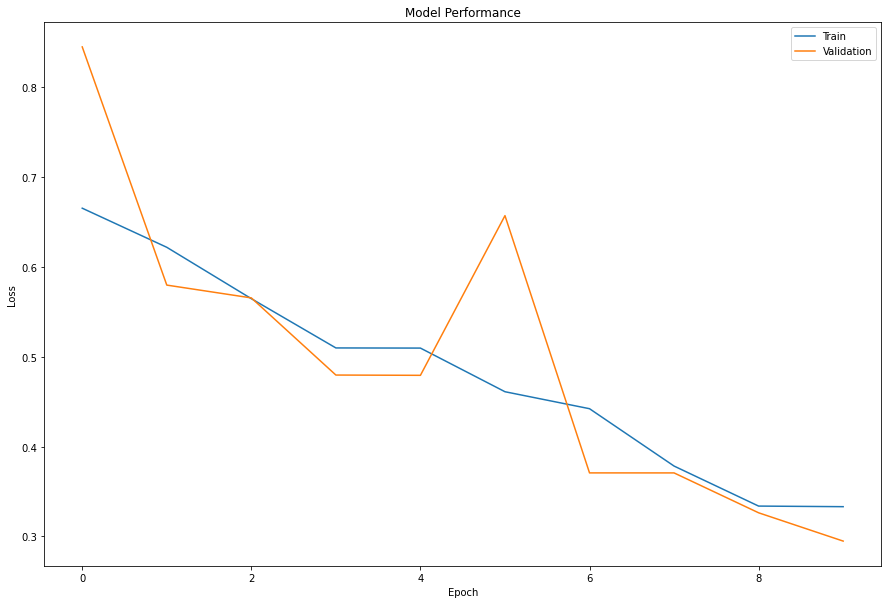

In [9]:
import matplotlib.pyplot as plt
#Loss Visualization for data training and validation

plt.figure(figsize=(15,10))
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

In [10]:
model = tf.keras.models.load_model("CNNP1V2.model")

# Data Latih

In [11]:
prediction = model.predict(Xtrain2)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.78293014

In [12]:
m = tf.keras.metrics.Precision()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.7279736

In [13]:
m = tf.keras.metrics.Recall()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.89687926

In [14]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

76.0

In [15]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

247.0

In [16]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

504.0

In [17]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

661.0

# Data Validasi

In [18]:
prediction = model.predict(Xval)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.84565914

In [19]:
m = tf.keras.metrics.Precision()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.8154762

In [20]:
m = tf.keras.metrics.Recall()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.8896104

In [21]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

34.0

In [22]:
m = tf.keras.metrics.FalsePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

62.0

In [23]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

252.0

In [24]:
m = tf.keras.metrics.TruePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

274.0

# Data Uji

In [25]:
prediction = model.predict(Xtest)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.69541776

In [26]:
m = tf.keras.metrics.Precision()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.6437247

In [27]:
m = tf.keras.metrics.Recall()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.86413044

In [28]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

25.0

In [29]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

88.0

In [30]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

99.0

In [31]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

159.0